# Mercedes-Benz Greener Manufacturing ML Project

Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv(r"C:\D-Drive\Data Science\Machine Learning\Projects\Mercedes-Benz Greener Manufacturing\train.csv")
test = pd.read_csv(r"C:\D-Drive\Data Science\Machine Learning\Projects\Mercedes-Benz Greener Manufacturing\test.csv")

In [3]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


# EDA of datasets

In [5]:
print("Type of Test data",type(test))
print("Type of Train data",type(train))

Type of Test data <class 'pandas.core.frame.DataFrame'>
Type of Train data <class 'pandas.core.frame.DataFrame'>


In [6]:
test.columns

Index(['ID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=377)

In [7]:
train.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [8]:
test.shape

(4209, 377)

It means the data set has 4209 rows and 377 columns

In [9]:
train.shape

(4209, 378)

In [10]:
print("Sum of NULL values present in train dataset:",train.isna().any().sum())
print("Sum of NULL values present in test dataset:",test.isna().any().sum())

Sum of NULL values present in train dataset: 0
Sum of NULL values present in test dataset: 0


C:\Users\ankita\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


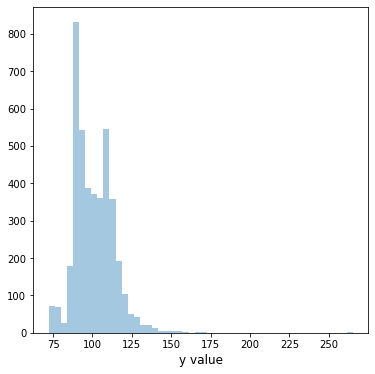

In [11]:
#Visulizing the Y distribution of the dataset, As Y is the output variable
plt.figure(figsize=(6,6))
sns.distplot(train.y.values, bins=50, kde=False)
plt.xlabel('y value', fontsize=12)
plt.show()

In [12]:
#check the unique values against every columns
train_UV=pd.DataFrame(train.nunique(),columns=['Unique'])
train_UV

,Unique
ID,4209
y,2545
X0,47
X1,27
X2,44
...,...
X380,2
X382,2
X383,2
X384,2


In [13]:
#columns who have more than 2 unique values
print('Train Features with unique values greater than 2\n',train_UV[train_UV.Unique >2].unstack())

Train Features with unique values greater than 2
 Unique  ID    4209
        y     2545
        X0      47
        X1      27
        X2      44
        X3       7
        X4       4
        X5      29
        X6      12
        X8      25
dtype: int64


In [14]:
#checking the same in test dataset
test_UV=pd.DataFrame(test.nunique(),columns=['Unique'])
test_UV

,Unique
ID,4209
X0,49
X1,27
X2,45
X3,7
...,...
X380,2
X382,2
X383,2
X384,2


In [15]:
print('Test Features with unique values greater than 2\n',test_UV[test_UV.Unique >2].unstack())

Test Features with unique values greater than 2
 Unique  ID    4209
        X0      49
        X1      27
        X2      45
        X3       7
        X4       4
        X5      32
        X6      12
        X8      25
dtype: int64


In [16]:
#checking the variance of the dataset, 
train_var=pd.DataFrame(train.var(axis=0),columns=['Variance'])
train_var

,Variance
ID,5.941936e+06
y,1.607667e+02
X10,1.313092e-02
X11,0.000000e+00
X12,6.945713e-02
...,...
X380,8.014579e-03
X382,7.546747e-03
X383,1.660732e-03
X384,4.750593e-04


In [17]:
#function to call zero variance columns
def features_zero_var(df):
    df_var=pd.DataFrame(df.var(axis=0),columns=['Variance']) 
    return((df_var[df_var.Variance==0]))

In [18]:
features_zero_var(train)

,Variance
X11,0.0
X93,0.0
X107,0.0
X233,0.0
X235,0.0
X268,0.0
X289,0.0
X290,0.0
X293,0.0
X297,0.0


In [19]:
train_new= train.drop(columns=train_var[train_var.Variance==0].index)

In [20]:
train_new.drop('ID', axis='columns', inplace=True)

As so many column have zero variance we will delete it, as it produces noise in the dataset

In [21]:
train_new

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,107.39,ak,s,as,c,d,aa,d,q,0,...,1,0,0,0,0,0,0,0,0,0
4205,108.77,j,o,t,d,d,aa,h,h,0,...,0,1,0,0,0,0,0,0,0,0
4206,109.22,ak,v,r,a,d,aa,g,e,0,...,0,0,1,0,0,0,0,0,0,0
4207,87.48,al,r,e,f,d,aa,l,u,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
train_new.shape

(4209, 365)

In [23]:
#checking the variance in test dataset
test_var=pd.DataFrame(test.var(axis=0),columns=['Variance'])
test_var

,Variance
ID,5.871311e+06
X10,1.865006e-02
X11,2.375861e-04
X12,6.885074e-02
X13,5.734498e-02
...,...
X380,8.014579e-03
X382,8.715481e-03
X383,4.750593e-04
X384,7.124196e-04


In [24]:
features_zero_var(test)

,Variance
X257,0.0
X258,0.0
X295,0.0
X296,0.0
X369,0.0


In [25]:
test_new= test.drop(columns=['ID','X11', 'X93', 'X107','X233', 'X235', 'X268', 'X289', 'X290', 'X293','X297','X330','X347'])

In [26]:
test_new.shape

(4209, 364)

In [27]:
##Checking Categorical Data in DataFrame for train Data
train_new.describe(include=object)

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12,25
top,z,aa,as,c,d,w,g,j
freq,360,833,1659,1942,4205,231,1042,277


In [28]:
#As the categorical data is not numerical so we need to do label encoding
from sklearn.preprocessing import LabelEncoder

In [29]:
def label_encoder(df):
    features=df.select_dtypes(include='object').columns 
    le=LabelEncoder() 
    for i in features:
        df[i]=le.fit_transform(df[i])

In [30]:
label_encoder(train_new)

In [31]:
train_new.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,32,23,17,0,3,24,9,14,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,32,21,19,4,3,28,11,14,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,20,24,34,2,3,27,9,23,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,20,21,34,5,3,27,11,4,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,20,23,34,5,3,12,3,13,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
##Checking Categorical Data in DataFrame for train Data
test_new.describe(include=object)

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,49,27,45,7,4,32,12,25
top,ak,aa,as,c,d,v,g,e
freq,432,826,1658,1900,4203,246,1073,274


# Visualization the Categorical variable w.r.t y(outcome variable)

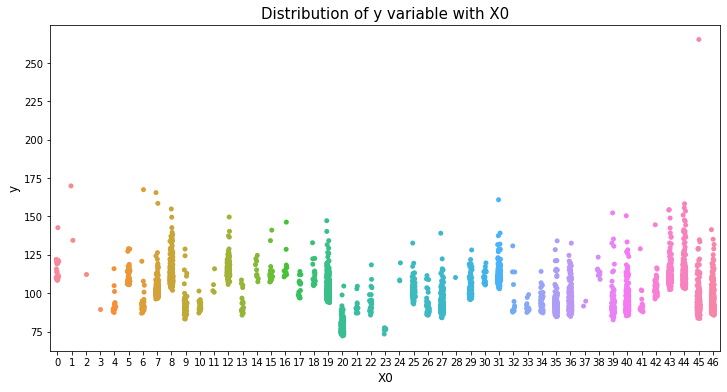

In [33]:
var="X0"
colu_order=np.sort(train_new[var].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var,y="y",data=train_new,order=colu_order)
plt.xlabel(var,fontsize=12)
plt.ylabel("y",fontsize=12)
plt.title("Distribution of y variable with "+var, fontsize=15)
plt.show()

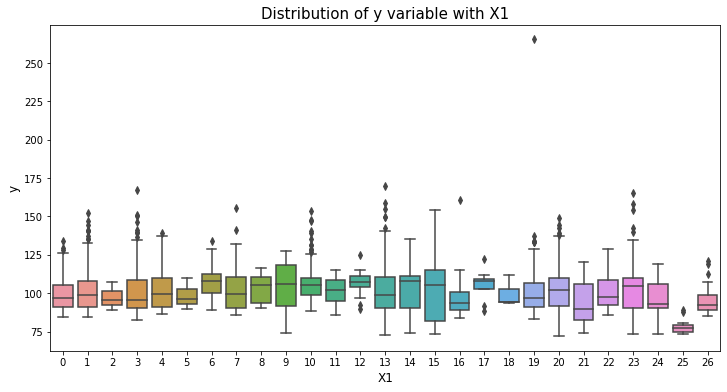

In [34]:
var="X1"
colu_order=np.sort(train_new[var].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var,y="y",data=train_new,order=colu_order)
plt.xlabel(var,fontsize=12)
plt.ylabel("y",fontsize=12)
plt.title("Distribution of y variable with "+var, fontsize=15)
plt.show()

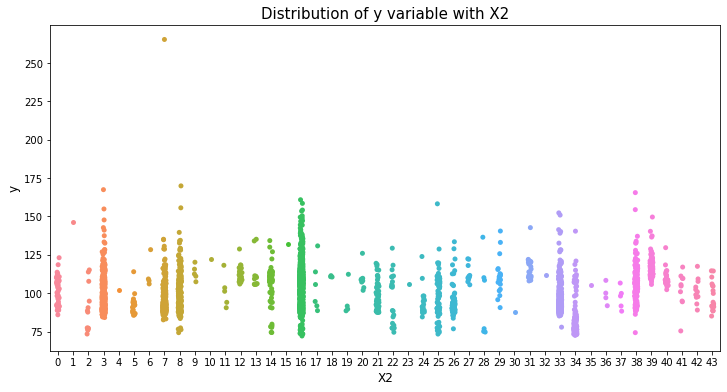

In [35]:
var="X2"
colu_order=np.sort(train_new[var].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var,y="y",data=train_new,order=colu_order)
plt.xlabel(var,fontsize=12)
plt.ylabel("y",fontsize=12)
plt.title("Distribution of y variable with "+var, fontsize=15)
plt.show()

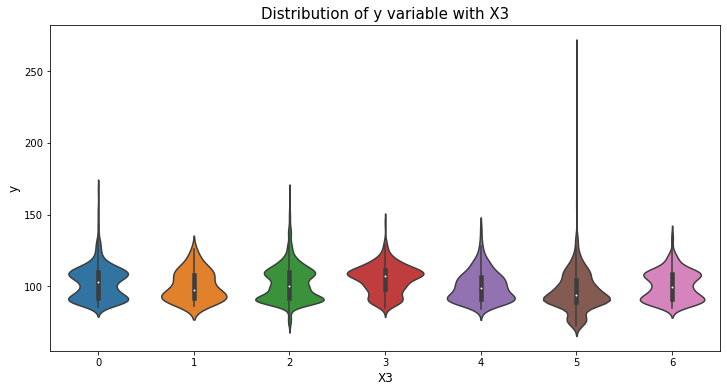

In [36]:
var="X3"
colu_order=np.sort(train_new[var].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var,y="y",data=train_new,order=colu_order)
plt.xlabel(var,fontsize=12)
plt.ylabel("y",fontsize=12)
plt.title("Distribution of y variable with "+var, fontsize=15)
plt.show()

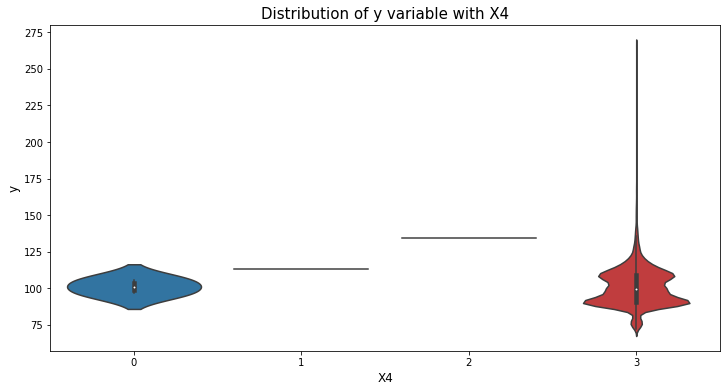

In [37]:
var="X4"
colu_order=np.sort(train_new[var].unique()).tolist()
plt.figure(figsize=(12,6))
sns.violinplot(x=var,y="y",data=train_new,order=colu_order)
plt.xlabel(var,fontsize=12)
plt.ylabel("y",fontsize=12)
plt.title("Distribution of y variable with "+var, fontsize=15)
plt.show()

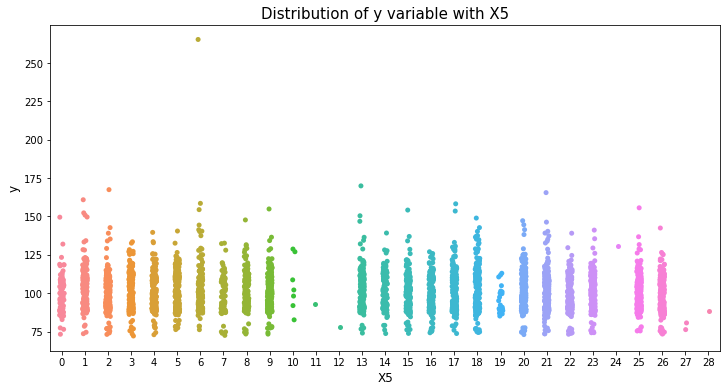

In [38]:
var="X5"
colu_order=np.sort(train_new[var].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var,y="y",data=train_new,order=colu_order)
plt.xlabel(var,fontsize=12)
plt.ylabel("y",fontsize=12)
plt.title("Distribution of y variable with "+var, fontsize=15)
plt.show()

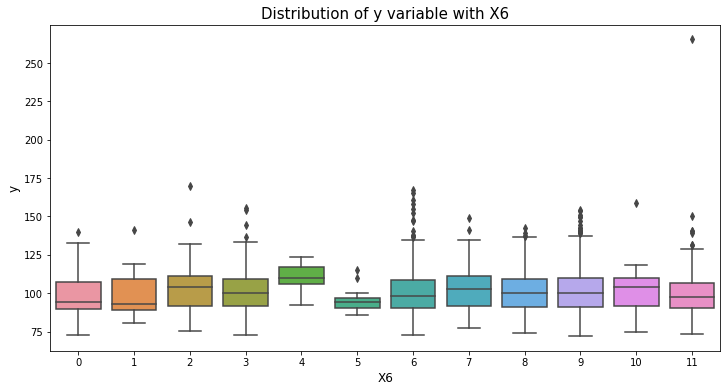

In [39]:
var="X6"
colu_order=np.sort(train_new[var].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var,y="y",data=train_new,order=colu_order)
plt.xlabel(var,fontsize=12)
plt.ylabel("y",fontsize=12)
plt.title("Distribution of y variable with "+var, fontsize=15)
plt.show()

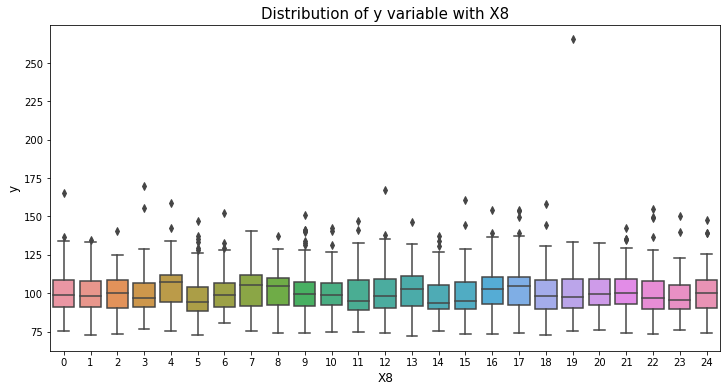

In [40]:
var="X8"
colu_order=np.sort(train_new[var].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var,y="y",data=train_new,order=colu_order)
plt.xlabel(var,fontsize=12)
plt.ylabel("y",fontsize=12)
plt.title("Distribution of y variable with "+var, fontsize=15)
plt.show()

# As the categorical variables are in string , so we have to do label encoding

In [41]:
from sklearn.preprocessing import LabelEncoder
label_encoder(train_new)
train_new.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,32,23,17,0,3,24,9,14,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,32,21,19,4,3,28,11,14,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,20,24,34,2,3,27,9,23,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,20,21,34,5,3,27,11,4,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,20,23,34,5,3,12,3,13,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
label_encoder(test_new)
test_new.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,21,23,34,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


In [43]:
x_train = train_new.drop('y',axis=1)
y_train =  train_new['y'].values

# Dimensionality Reduction using PCA

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 10)
pca.fit(x_train)

PCA(n_components=10)

In [45]:
pca_x_train= pca.transform(x_train)
pca_x_train.shape

(4209, 10)

In [46]:
x_test = test_new
pca_x_test = pca.transform(x_test)
pca_x_test.shape

(4209, 10)

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(pca_x_train,y_train,test_size=0.25,random_state=100)

# Modeling and testing the data using XGBOOST

In [48]:
import xgboost as xgb
from sklearn.metrics import r2_score

In [49]:
# Building the final feature set
f_train = xgb.DMatrix(x_train, label = y_train)
f_valid = xgb.DMatrix(x_test, label = y_test)
f_test = xgb.DMatrix(pca_x_test)

In [50]:
# Setting the parameters for XGB
params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4

In [51]:
# Predicting the score
# Creating a function for the same

def scorer(m, w):
    labels = w.get_label()
    return 'r2', r2_score(labels, m)

final_set = [(f_train, 'train'), (f_valid, 'pred')]

P = xgb.train(params, f_train, 1000, final_set, early_stopping_rounds=50, feval=scorer, maximize=True, verbose_eval=10)

[15:26:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:98.75449	train-r2:-64.48366	pred-rmse:99.65597	pred-r2:-49.73256
[10]	train-rmse:80.93552	train-r2:-42.98426	pred-rmse:81.88810	pred-r2:-33.25483
[20]	train-rmse:66.40878	train-r2:-28.61217	pred-rmse:67.41641	pred-r2:-22.21729
[30]	train-rmse:54.57908	train-r2:-19.00191	pred-rmse:55.66895	pred-r2:-14.83093
[40]	train-rmse:44.96291	train-r2:-12.57463	pred-rmse:46.15663	pred-r2:-9.88299
[50]	train-rmse:37.16322	train-r2:-8.27355	pred-rmse:38.47375	pred-r2:-6.56152
[60]	train-rmse:30.85887	train-r2:-5.39410	pred-rmse:32.30477	pred-r2:-4.33106
[70]	train-rmse:25.78884	train-r2:-3.46563	pred-rmse:27.37907	pred-r2:-2.82928
[80]	train-rmse:21.73907	train-r2:-2.17323	pred-rmse:23.48134	pred-r2:-1.81661
[90]	train-rmse:18.53255	train-r2:-1.30616	pred-rmse:20.44097	pred-r2:-1.13444
[100]	train-rmse:16.01896

In [52]:
# Predicting on test set
p_test = P.predict(f_test)
p_test

array([ 82.45813 ,  94.956276,  89.14604 , ..., 101.18644 , 107.139946,
        97.557365], dtype=float32)

In [53]:
Predicted_Data = pd.DataFrame()
Predicted_Data['y'] = p_test
Predicted_Data.head()

,y
0,82.458130
1,94.956276
2,89.146042
3,75.992264
4,108.902969
